In [47]:
#Import all the dependencies
import gensim
from os import listdir
from os.path import isfile, join
import csv
import codecs
import numpy as np

In [48]:
names = []
sols = []
mws = []
count=0

with codecs.open('database.csv', encoding='latin-1') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if count>0 and count%2 == 0:
            names.append(row[0])
            sols.append(row[2])
            mws.append(row[3])
        count+=1

In [49]:
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec-100_2018.model')

In [50]:
docvec = d2v_model.docvecs['Benzene'] #if string tag used in training
print (docvec)

[-0.75500679 -0.43680167 -0.13913061 -0.57701629 -0.11307444 -0.65627736
  0.87061942 -0.25137493  0.70451736 -0.34250194 -0.53280485  0.04416353
 -0.27163869  0.32215652  0.04752771  0.42075649 -0.04850473 -0.07412037
 -0.17391942 -0.65578824 -0.40651619  0.21120033  0.26031673 -0.27739561
  0.08672595  0.4773559  -0.11759339 -0.23549393  0.06449878 -0.23311999
 -0.24593835  0.53775275  0.15470284  0.04381965  0.3131505  -0.20784608
  0.40487763 -0.32675251 -0.44915399  0.54399043  0.27686751  0.01956967
 -0.26718682  0.00163408  0.04193207 -0.05363823  0.34182274  0.27086157
  0.13846241 -0.23683959 -0.15509184  0.72022432  0.0971325  -0.49480292
  0.05936281  0.7501899  -0.34401509 -0.01438561 -0.61504519  0.19543172
  0.14909539 -0.83625549 -0.01036144  0.28767723  0.07374649  0.30718321
  0.08233786  0.37459114 -0.03787046  0.46833441  0.7385754  -0.06160124
 -0.07342319 -0.21569678  0.14777233 -0.00608509  0.31963056 -0.35349214
  0.58628982  0.54492992  0.61013144 -0.0891577   0

In [51]:
X = []
Y = []
err = []
    
for i in range(len(sols)):
    try:
        Y.append(float(sols[i])) 
        temp = d2v_model.docvecs[names[i]]
        temp = np.append(temp,mws[i])
        X.append(temp)
    except:
        if sols[i] is not None:
            try:
                Y.append(float(s[1:])) 
                temp = d2v_model.docvecs[names[i]]
                temp = np.append(temp,mws[i])
                X.append(temp)
            except:
                err.append(i)      

In [21]:
sorted(np.log(Y))

[-29.457372029926223,
 -26.434072926539578,
 -25.834274105189454,
 -25.066071758467011,
 -24.625338511521388,
 -24.539978662570231,
 -23.97260086929932,
 -23.942141661814613,
 -23.776627223337037,
 -23.538344610807144,
 -22.689378693319245,
 -22.394579153098601,
 -22.337716291204057,
 -22.33270374938051,
 -22.146224182437894,
 -21.593150196006409,
 -21.560283387926059,
 -21.493294061842313,
 -21.482552820010902,
 -21.180550693784372,
 -21.09143516031088,
 -20.966612095578139,
 -20.938937373421918,
 -20.729283909271974,
 -20.549312529822974,
 -20.408455097106376,
 -20.408455097106376,
 -20.317800728838247,
 -20.186772466431844,
 -20.146652472642419,
 -19.948538669394043,
 -19.907901023662216,
 -19.851972471002991,
 -19.806975105072254,
 -19.79900693542308,
 -19.33697147582652,
 -19.33697147582652,
 -19.33697147582652,
 -19.154649919032565,
 -19.113827924512311,
 -19.113827924512311,
 -19.020337581424972,
 -18.953411203106405,
 -18.950009839282917,
 -18.885895856466306,
 -18.777355687891

In [52]:
#Removing Outliers

XP = []
YP = []
for i in range(len(Y)):
    if Y[i]<100:
        YP.append(Y[i])
        XP.append(X[i])

X = XP
Y= YP

In [53]:
# Splitting the dataset into the Training set and Test set
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
sc = StandardScaler()
rb = RobustScaler()

import matplotlib
import matplotlib.pyplot as plt



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
X = rb.fit_transform(X)
# Y = pd.cut(Y, 200, labels=False)
# Y = np.log10(Y)
# Y/np.linalg.norm(Y, ord=np.inf, axis=0, keepdims=True)






#Dataset is skewed, need to fix class weight.
# from sklearn.utils import class_weight
# class_weight = class_weight.compute_class_weight('balanced', np.unique(Y), Y)

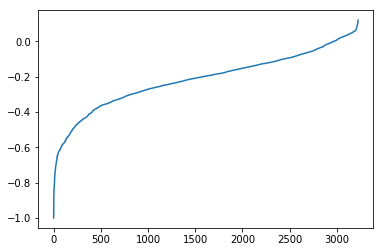

In [40]:
Y =Y/np.linalg.norm(Y, ord=np.inf, axis=0, keepdims=True)
plt.plot(sorted(Y))
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [54]:
np.save('X_reg.npy',X)
np.save('Y_reg.npy',Y)

In [ ]:
#Standard Starter Network

# embedding then bi lstm then dense with softmax
# if this doesn't work,  replace bilstm with first bigru
# and then replace that with a 1d or 2d as necessary cnn

In [1]:
# # Importing the Keras libraries and packages
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.optimizers import SGD
# from keras.callbacks import EarlyStopping
# from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [ ]:
# # define base model
# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(10, input_dim=16, kernel_initializer='normal', activation='tanh'))
#     #model.add(Dropout(0.2))
#     model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal', activation='relu'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='RMSProp' , metrics=['accuracy'])
#     #model.compile(loss='mean_squared_error', optimizer='RMSProp')

#     return model